
**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2021**

---
## Trabajo práctico entregable - Parte 1

In [1]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn

seaborn.set_context('talk')
seaborn.set_theme(style="ticks")

## Lectura del dataset

En la notebook *00* se explican los detalles de la siguiente sección.

In [2]:
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url)

In [3]:
df[:3]

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,...,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,...,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,...,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,...,En un trabajo anterior,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN


# Ejercicio 1 - Análisis descriptivo

Responder a la pregunta: **¿Cuáles son los lenguajes de programación asociados a los mejores salarios?**

Para ello:
1. Seleccionar las columnas relevantes para analizar.

**Respuesta**
Para estudiar los lenguajes de programación asociados a los mejores salarios, y responder a la pregunta, se procede a elegir las columnas `tools_programming_lenguages`, `salary_monthly_NETO`, y `work_contract_type`.


2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en una sub-población. Por ejemplo, se pueden limitar a personas con un salario mayor que 10000 pesos, o a las personas que trabajan sólo en "Data Science", pero deben justificar su elección y reformular la pregunta inicial de ser necesario.

**Respuesta**
Observando los datos se pudo apreciar la existencia de valores *NaN* y errónes, por lo que se procedió a eliminar los valores nulos y los menores a 1000 que existían en la columna `salary_monthly_NETO`.
Para los valores extremos superiores, se procedió a eliminar los mayores al percentil 99, entendiendo que esto genera un sesgo en la media muestral.
Debido que los lenguajes con mejores salarios se verían más afectados, se procedió a realizar el filtrado por cada lenguaje de forma independiente.

  * Obtener una lista de los lenguajes de programación más populares. Decidir cuántos y cuáles seleccionan para incluir en el análisis.

**Respuesta**
Se procedió a elegir los lenguajes en función del interés propio del grupo, basado en las experiencias de cada integrante y cuales podrían ser interesantes contrastar.

  * Para cada una de las otras columnas del punto anterior, elegir los rangos o valores que seleccionan para incluir en el análisis.
3. Seleccionar métricas que ayuden a responder la pregunta, y los métodos para analizarlas. Elegir **UNA** de las siguientes opciones:
  * Comparar las distribuciones de salario para cada lenguaje utilizando visualizaciones. Como la visualización es el producto final, debe ser clara y mostrar información relevante.
  * Comparar medidas de estadística descriptiva sobre la distribución de salario para cada lenguaje. Sean creativos, la estadística descriptiva nos permite decir cosas como: "el 10% de los mejores sueldos los ganan, en su mayoría, programadores que saben *Kotlin*!" (donde *mayoría* es un término medio engañoso que sólo significa más del 50%). Para comparar múltiples lenguajes, les recomendamos usar también visualizaciones.
  * Comparar probabilidades. Por ejemplo: "Si sabés *Python* o *Java*, tenés un 30% más de chances de ganar arriba de 100K".

Si lo consideran necesario, realicen varias iteraciones. Es decir, si encuentran que las distribuciones de los lenguajes de programación que seleccionaron inicialmente no son muy diferentes, pueden re-hacer el análisis usando sólo los lenguajes de programación que son diferentes.

### 1. Selección de Columnas Relevantes

In [4]:
# complete here if you want to include more columns.
relevant_columns = ['tools_programming_languages',
                    'salary_monthly_NETO',
                    'work_contract_type',
                    'salary_in_usd'
                   ]

neto = 'salary_monthly_NETO'
contrato = 'work_contract_type'
lenguajes = 'tools_programming_languages'

df.columns

Index(['profile_gender', 'profile_age', 'work_country', 'work_province',
       'profile_years_experience', 'work_years_in_company',
       'work_years_in_current_position', 'work_people_in_charge_of',
       'profile_studies_level', 'profile_studies_level_state',
       'profile_career', 'profile_university',
       'profile_specialization_courses', 'profile_open_source_contributions',
       'profile_programming_as_hobby', 'work_role', 'tools_platform',
       'tools_programming_languages', 'tools_frameworks', 'tools_data_bases',
       'tools_qa_testing', 'tools_IDEs', 'tools_work_pc_os',
       'tools_cellphone_os', 'work_on_call_duty', 'salary_on_call_duty_charge',
       'work_on_call_duty_charge_type', 'work_contract_type',
       'salary_monthly_BRUTO', 'salary_monthly_NETO', 'salary_in_usd',
       'salary_satisfaction', 'salary_comparison_last_semester',
       'salary_has_bonus', 'salary_bonus_tied_to',
       'salary_inflation_adjustment_2020',
       'salary_percentage_inf

### Conteo de frecuencias de los lenguajes de programación

La columna que contiene información sobre los lenguajes de programación utilizados es `tools_programming_languages`. Sus valores son *strings* con los lenguajes seleccionados, separados por comas.

In [5]:
df.tools_programming_languages[:5]

0                                              Ninguno
1                             HTML, Javascript, Python
2                                              Ninguno
3    Bash/Shell, C, CSS, HTML, Java, Javascript, PH...
4               CSS, HTML, Javascript, SQL, TypeScript
Name: tools_programming_languages, dtype: object

### 2. Selección de Filas Relevantes

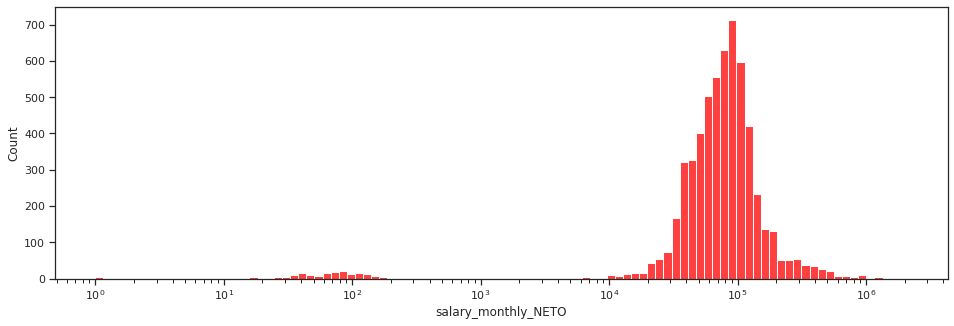

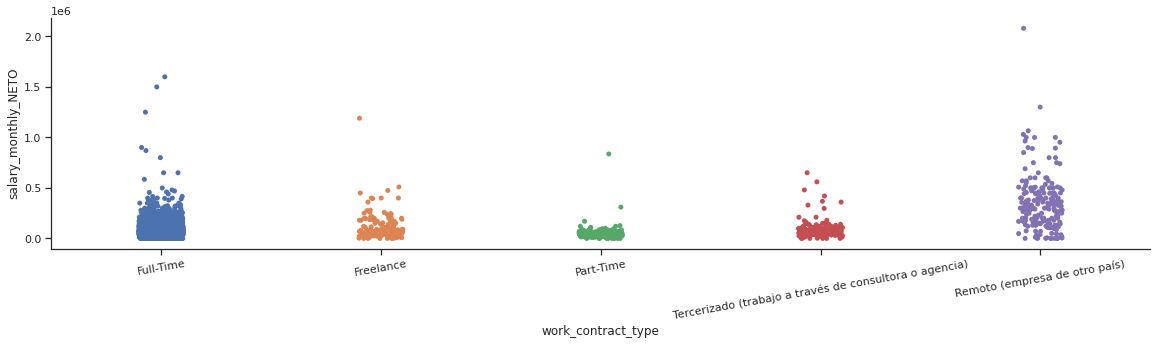

In [6]:
# Gráfico en escala logarítmica, donde se ven los valores (salarios) errónes menores a 1000.
fig= plt.subplots(figsize=(16, 5))
seaborn.histplot(df[neto], bins=100, color='red', log_scale=True);

# Gráfico donde se ve que existe una diferencia de salarios en función del tipo de contrato.
# Podría ser interesante estudiarlo, o tomar una subpoblación (por ejemplo, Full-Time).
seaborn.catplot(data=df, x=contrato, y=neto, height=4, aspect=4)
plt.xticks(rotation=10);

In [7]:
print(f'Cantidad de filas en el DF: {len(df)}')

# ¿Cuántos NaN existen en la columna de salarios?
print(f'Cantidad de salarios nulos: {df[neto].isnull().sum()}')

# Limpieza de valores nulos.
df.dropna(subset=[neto], inplace=True)
print(f'Cantidad de filas en el DF: {len(df)}')

# ¿Cuántos salarios erróneos existen en la columna de salarios?
print(f'Cantidad de salarios <= 1K: {(df[neto] <= 1000).sum()}')

# Considerando el salario mínimo.
df = df[df[neto] > 1000]
print(f'Cantidad de filas en el DF: {len(df)}')

# Percentil 99.
max_salary = df[neto].quantile(0.99)
print(f'Percentil 99: {max_salary}')

# ¿Cuántos salarios son anómalos en la columna de salarios?
print(f'Cantidad de salarios anómalos: {(df[neto] >= max_salary).sum()}')

# Considerando el salario del percentil 99.
df = df[df[neto] < max_salary]
print(f'Cantidad de filas en el DF: {len(df)}')

# Datos Muestrales (sobre el salario NETO).
df[neto].describe()

Cantidad de filas en el DF: 6095
Cantidad de salarios nulos: 212
Cantidad de filas en el DF: 5883
Cantidad de salarios <= 1K: 177
Cantidad de filas en el DF: 5706
Percentil 99: 500000.0
Cantidad de salarios anómalos: 59
Cantidad de filas en el DF: 5647


count      5647.000000
mean      90912.059819
std       61710.303553
min        1100.000000
25%       53975.500000
50%       79000.000000
75%      106000.000000
max      490000.000000
Name: salary_monthly_NETO, dtype: float64

In [8]:
df.salary_in_usd = df.salary_in_usd.notna()

#### Determinación de lenguajes más populares
Las siguientes celdas de código separan estos lenguajes de programación, y cuentan la frecuencia con la que aparecen.

No es necesario entender este código en profundidad, aunque sí es un buen ejercicio.

In [9]:
def split_languages(languages_str):
    """
    Convert the comma-separated string of languages to a list of string.
    Remove 'ninguno de los anteriores' option, spaces, and training commas.
    """
    if not isinstance(languages_str, str):
        return []
    # Remove others options.
    other = 'ninguno de los anteriores'
    languages_str = languages_str.lower().replace(other, '')
    other = 'ninguno'
    languages_str = languages_str.lower().replace(other, '')
    # Split string into list of items.
    # Remove spaces and commas for each item.
    return [lang.strip().replace(',', '') for lang in languages_str.split()]

print(f'Dimensiones del DF: {df.shape}')

# Create a new column with the list of languages.
lenguajes_curados = 'cured_programming_languages'
df[lenguajes_curados] = df.tools_programming_languages.apply(split_languages)

if lenguajes_curados not in relevant_columns:
    relevant_columns.append(lenguajes_curados)

# Duplicate each row of DF for each programming language mentioned in the response.
# We only include in df_lang the columns we are going to analyze later, so we
# don't duplicate innecesary information.
df_lang = df.cured_programming_languages\
    .apply(pd.Series).stack()\
    .reset_index(level=-1, drop=True).to_frame()\
    .join(df[relevant_columns])\
    .rename(columns={0: 'programming_language'})
# Horrible programming style! But a lot of data science code can be written as
# concatenations of functions (pipelines), and there's no elegant way of
# doing that on Python.

print(f'Dimensiones del DF: {df_lang.shape}')
df_lang[:5]

Dimensiones del DF: (5647, 48)
Dimensiones del DF: (16351, 6)


,programming_language,tools_programming_languages,salary_monthly_NETO,work_contract_type,salary_in_usd,cured_programming_languages
1,html,"HTML, Javascript, Python",63000.0,Full-Time,False,"[html, javascript, python]"
1,javascript,"HTML, Javascript, Python",63000.0,Full-Time,False,"[html, javascript, python]"
1,python,"HTML, Javascript, Python",63000.0,Full-Time,False,"[html, javascript, python]"
3,bash/shell,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,Full-Time,False,"[bash/shell, c, css, html, java, javascript, p..."
3,c,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,Full-Time,False,"[bash/shell, c, css, html, java, javascript, p..."


# TODO

#### ¿Como filtrar/contar frecuencias del indice del df?
cantidad de elementos unicos en df_lang == cantidad de programadores (df original filtrado (df_without_null_percentil))

En la columna `programming_language` se encuentra cada lenguaje por separado. Notar que si una respuesta contenía 3 lenguajes, como `"HTML, Javascript, Python"`, la fila ha sido replicada 3 veces. Por ello, hay tres filas con índice 1.

In [10]:
language_count = df_lang.programming_language.value_counts()\
    .reset_index()\
    .rename(columns={'index': 'language', 'programming_language': 'frequency'})

print(f'Cantidad de lenguajes: {len(language_count)}')
language_count[:10]

Cantidad de lenguajes: 195


,language,frequency
0,javascript,2308
1,sql,2012
2,html,1716
3,python,1369
4,java,1363
5,css,1147
6,bash/shell,929
7,php,820
8,.net,773
9,typescript,713


#### Filtrado de lenguajes relevantes

El siguiente código permite seleccionar sólo las filas donde el valor de la columna `programming_language` se encuentre en la lista `interesting_languages`.

In [11]:
# Seleccionados según el interés del grupo, en función del conocimiento de dominio, experiencia, etc.
interesting_languages = ["python", ".net", "java", "scala", "typescript", "go"]

# Inicialmente también se incluyó a Haskell, pero posee muy pocos valores para estudiarlo.
print(f'Programadores de Haskell: {(df_lang.programming_language == "haskell").sum()}')

filtered_df_lang = df_lang[df_lang.programming_language.isin(interesting_languages)]
filtered_df_lang[:5]

Programadores de Haskell: 0


,programming_language,tools_programming_languages,salary_monthly_NETO,work_contract_type,salary_in_usd,cured_programming_languages
1,python,"HTML, Javascript, Python",63000.0,Full-Time,False,"[html, javascript, python]"
3,java,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,Full-Time,False,"[bash/shell, c, css, html, java, javascript, p..."
3,python,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,Full-Time,False,"[bash/shell, c, css, html, java, javascript, p..."
4,typescript,"CSS, HTML, Javascript, SQL, TypeScript",106000.0,Full-Time,False,"[css, html, javascript, sql, typescript]"
5,java,"Java, Javascript",44000.0,Full-Time,False,"[java, javascript]"


In [12]:
language_count[language_count.language.isin(interesting_languages)]

,language,frequency
3,python,1369
4,java,1363
8,.net,773
9,typescript,713
11,go,273
18,scala,104


# TODO
### ¿Mejor salario?

- salarios por encima del Q3
- [X] salarios por encima del Q2 (median)
- salarios por encima de X monto (teniendo cuenta el salario promedio argentino, quienes pagan ganancias, etc.)

# TODO
### prueba con df filtrado: salarios por debajo del Q1

### 3. Selección de Métricas Relevantes 

In [13]:
# Programadores
programmers = len(df)
# Mediana del salario NETO
neto_median = df[neto].median()
# Un salario NETO arbitrario
neto_x = 100000

programmers_over_median = len(df[df[neto] > neto_median])
programmers_over_x = len(df[df[neto] > neto_x])

print(f'Cantidad programadores: {programmers}\n')
for lang in interesting_languages:
    specific_lang_programmers = len(filtered_df_lang[filtered_df_lang['programming_language'] == lang])
    print(f'Cantidad programadores de {lang}: {specific_lang_programmers}')
    prob_lang = specific_lang_programmers / programmers
    print(f'Probabilidad de utilizar {lang}: {prob_lang}\n')

# Probabilidad de ganar por encima de la mediana (trivial).
print(f'Probabilidad de ganar por encima mediana ({neto_median}): {programmers_over_median / programmers}')

# Probabilidad de ganar por encima de X.
print(f'Probabilidad de ganar por encima X ({neto_x}): {programmers_over_x / programmers}')

Cantidad programadores: 5647

Cantidad programadores de python: 1369
Probabilidad de utilizar python: 0.2424296086417567

Cantidad programadores de .net: 773
Probabilidad de utilizar .net: 0.13688684257127678

Cantidad programadores de java: 1363
Probabilidad de utilizar java: 0.24136709757393307

Cantidad programadores de scala: 104
Probabilidad de utilizar scala: 0.018416858508942802

Cantidad programadores de typescript: 713
Probabilidad de utilizar typescript: 0.12626173189304055

Cantidad programadores de go: 273
Probabilidad de utilizar go: 0.048344253585974856

Probabilidad de ganar por encima mediana (79000.0): 0.4976093500973969
Probabilidad de ganar por encima X (100000): 0.282982114397025


## Gráficos

In [14]:
pd.crosstab(index=filtered_df_lang[neto] > neto_x,
            columns=filtered_df_lang.programming_language,
            margins=True, normalize=True, margins_name='Total')

programming_language,.net,go,java,python,scala,typescript,Total
salary_monthly_NETO,,,,,,,
False,0.121436,0.025462,0.188466,0.188466,0.008270,0.099674,0.631774
True,0.046790,0.033950,0.108161,0.109467,0.014363,0.055495,0.368226
Total,0.168226,0.059412,0.296627,0.297933,0.022633,0.155169,1.000000


**Conclusión**
Parece que de nuestros lenguajes elegidos, los programadores que tienen más probabilidad de cobrar por encima de un valor **X** (**100K**), son los que utilizan *Python* o *Java*.
De todas formas, hay que reconocer que esas probabilidades no son tan esperanzadoras ya que apenas superan el *10%*.

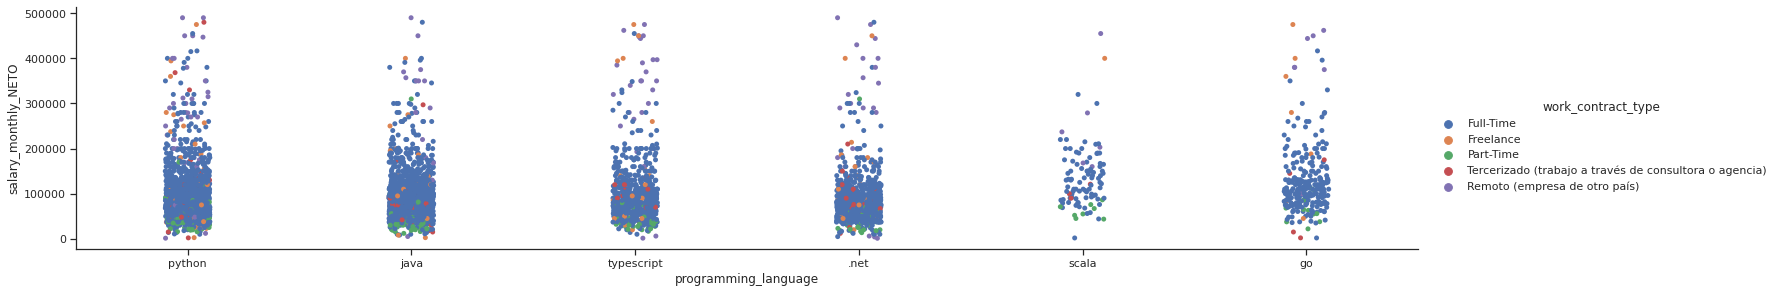

In [15]:
seaborn.catplot(data=filtered_df_lang,
                x='programming_language',
                y=neto,
                hue=contrato,
                aspect=5, height=4);

## Gráfico de caja

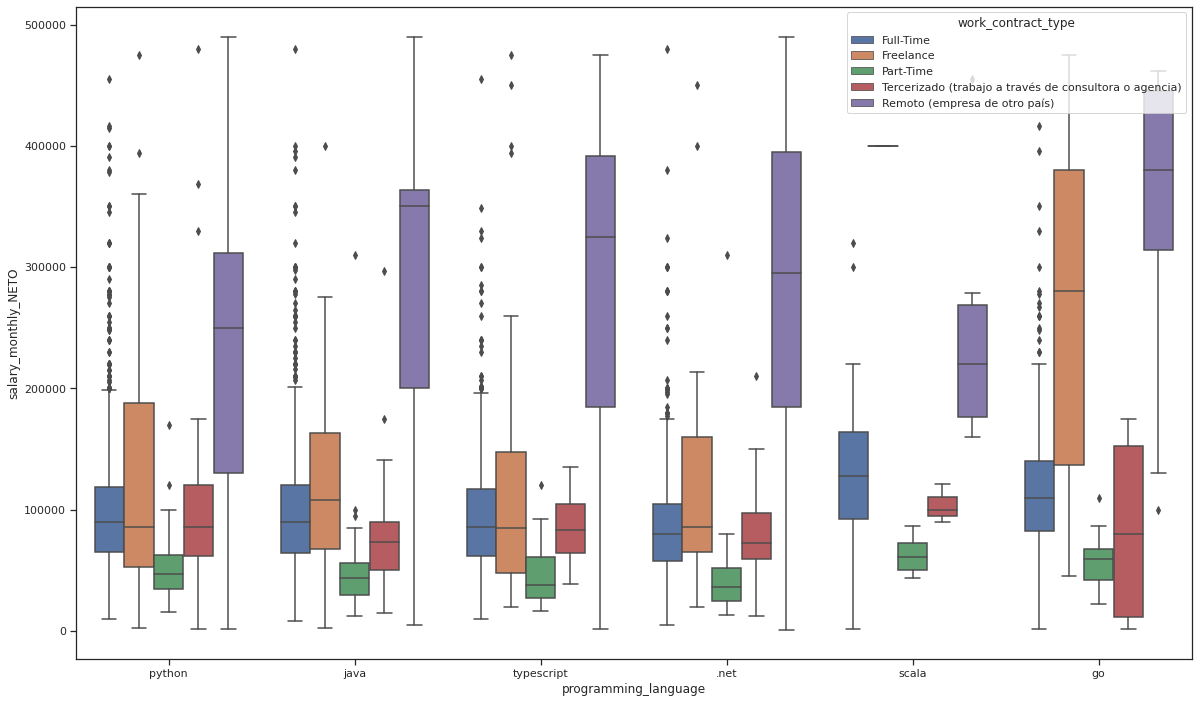

In [16]:
plt.figure(figsize=(20, 12))
seaborn.boxplot(data=filtered_df_lang,
                x='programming_language',
                y=neto,
                hue=contrato);

**Conclusión**
El gráfico hace evidente una diferencia importante en el sueldo NETO percibido por alguien con trabajo remoto, y alguien con otro tipo de contrato de trabajo.
Si tomamos *Python*, la mediana de los programadores con trabajo remoto es próxima a los **250K**, mientras que para los demás contratos es próxima (o incluso menor) a los **100K**.

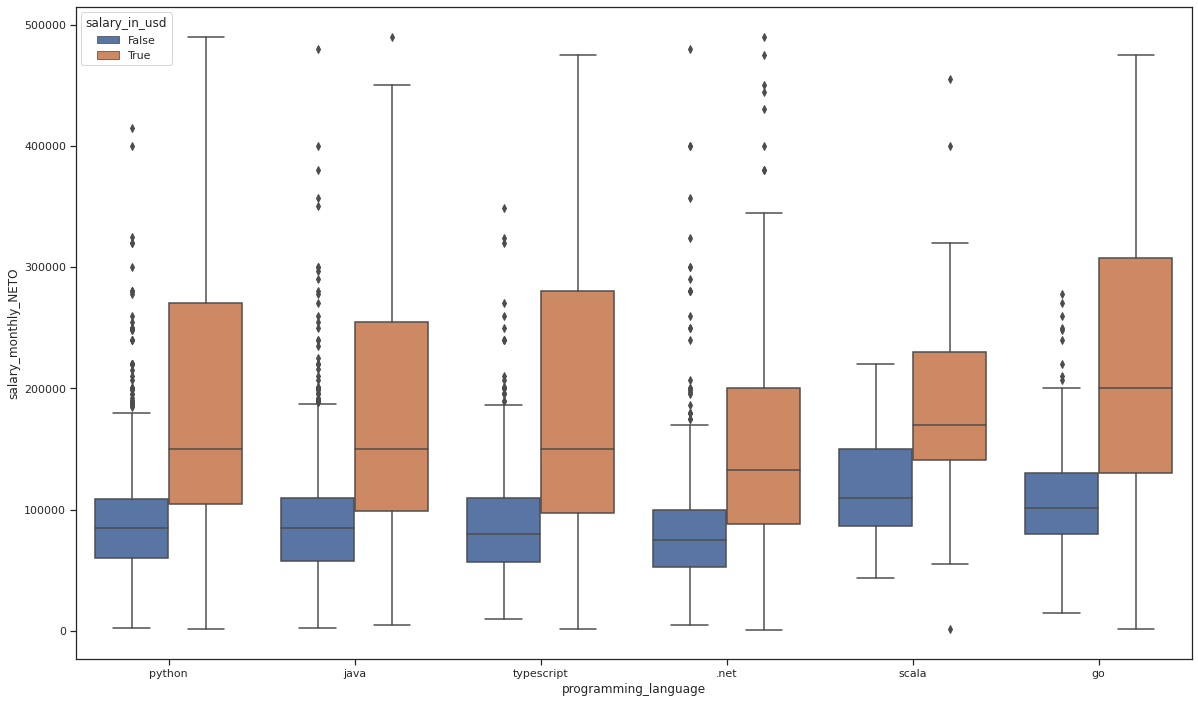

In [17]:
plt.figure(figsize=(20, 12))

seaborn.boxplot(data=filtered_df_lang,
                x='programming_language',
                y=neto,
                hue='salary_in_usd');

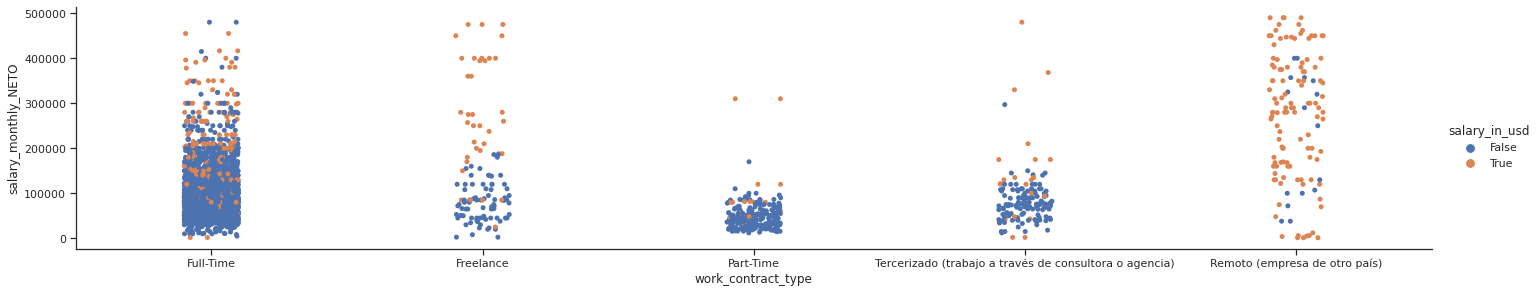

In [18]:
seaborn.catplot(data=filtered_df_lang,
                x='work_contract_type',
                y=neto,
                hue='salary_in_usd',
                aspect=5, height=4);